In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset
df = pd.read_csv('https://raw.githubusercontent.com/salemprakash/EDA/main/Data/opt.csv')

In [3]:
print(df.head())


   rownames     PID Clinic Group  Age Black White Nat.Am Asian Hisp  ...  \
0         1  100034     NY     C   25   Yes   No     No    No        ...   
1         2  100042     NY     C   21   Yes   No     No    No        ...   
2         3  100067     NY     T   25   No    Yes    No    No   Yes  ...   
3         4  100083     NY     C   36   Yes   No     No    No        ...   
4         5  100091     NY     C   21   No    Yes    No    No   Yes  ...   

  BL..FN BL..S7 V5..AA V5..PG V5..TD  V5..TF V5..PI  V5..CR V5..FN  V5..S7  
0    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
1  22.15  33.02    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
2  12.51  23.31    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
3    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  
4    NaN    NaN    NaN    NaN    NaN     NaN    NaN     NaN    NaN     NaN  

[5 rows x 172 columns]


In [4]:
print(f"The dimensions of the dataframe are: {df.shape}")

The dimensions of the dataframe are: (823, 172)


In [5]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Columns: 172 entries, rownames to V5..S7
dtypes: float64(86), int64(13), object(73)
memory usage: 1.1+ MB
None


In [6]:
# Calculate the percentage of missing values for each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

In [7]:
# Create a DataFrame to display missing value information
missing_info = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage})
missing_info = missing_info[missing_info['Missing Values'] > 0]
missing_info = missing_info.sort_values(by='Percentage', ascending=False)

In [8]:
# Print columns with more than 50% missing values
print("Columns with more than 50% missing values:")
print(missing_info[missing_info['Percentage'] > 50])


Columns with more than 50% missing values:
              Missing Values  Percentage
BL.Drks.Day              810   98.420413
BL.Diab.Type             799   97.083840
BL.Cig.Day               731   88.821385
V5..CR                   498   60.510328
V5.DNA                   498   60.510328
V5.Univ                  498   60.510328
V5..PG                   498   60.510328
V5..AA                   498   60.510328
V5.CR                    498   60.510328
V5.PI                    498   60.510328
V5.TF                    498   60.510328
V5.TD                    498   60.510328
V5.PG                    498   60.510328
V5.AA                    498   60.510328
V5.FN                    498   60.510328
V5.S7                    498   60.510328
V5..TD                   498   60.510328
V5..TF                   498   60.510328
V5..PI                   498   60.510328
V5..S7                   498   60.510328
V5..FN                   498   60.510328
BL.PG                    430   52.247874
BL..TF        

In [9]:
# Clean object type columns by stripping leading/trailing whitespace
for col in df.select_dtypes(include=['object']).columns:
    df[col] = df[col].str.strip()

In [10]:
# Create a 'Race' column for easier analysis
def get_race(row):
    if row['Black'] == 'Yes':
        return 'Black'
    elif row['White'] == 'Yes':
        return 'White'
    elif row['Nat.Am'] == 'Yes':
        return 'Nat.Am'
    elif row['Asian'] == 'Yes':
        return 'Asian'
    elif row['Hisp'] == 'Yes':
        return 'Hisp'
    return 'Unknown'

In [11]:
df['Race'] = df.apply(get_race, axis=1)


Text(0, 0.5, 'Count')

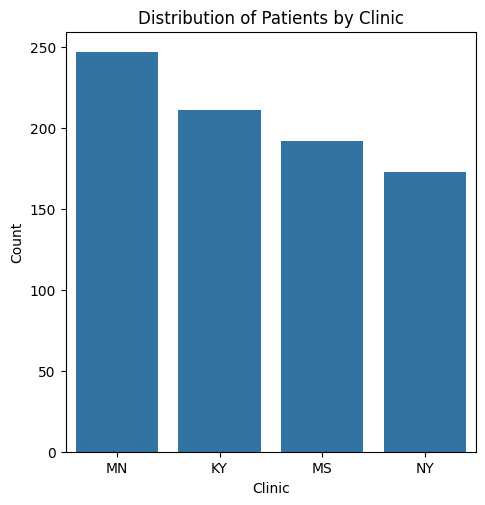

In [12]:
plt.figure(figsize=(18, 12))

# Clinic
plt.subplot(2, 3, 1)
sns.countplot(x='Clinic', data=df, order=df['Clinic'].value_counts().index)
plt.title('Distribution of Patients by Clinic')
plt.xlabel('Clinic')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

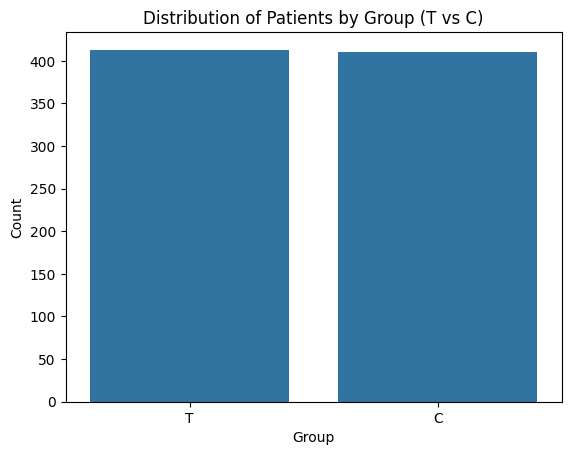

In [13]:
sns.countplot(x='Group', data=df, order=df['Group'].value_counts().index)
plt.title('Distribution of Patients by Group (T vs C)')
plt.xlabel('Group')
plt.ylabel('Count')

Text(0, 0.5, 'Count')

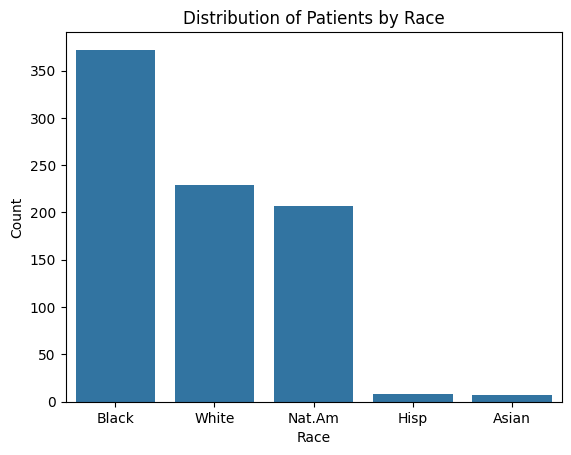

In [14]:
sns.countplot(x='Race', data=df, order=df['Race'].value_counts().index)
plt.title('Distribution of Patients by Race')
plt.xlabel('Race')
plt.ylabel('Count')

Text(0, 0.5, 'Education')

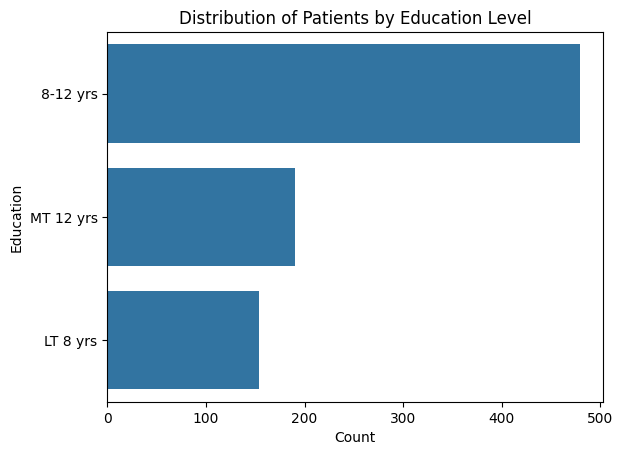

In [15]:
sns.countplot(y='Education', data=df, order=df['Education'].value_counts().index)
plt.title('Distribution of Patients by Education Level')
plt.xlabel('Count')
plt.ylabel('Education')

Text(0, 0.5, 'Count')

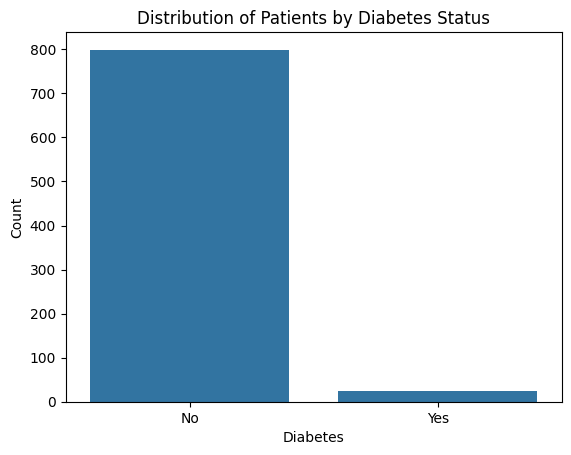

In [16]:
sns.countplot(x='Diabetes', data=df, order=df['Diabetes'].value_counts().index)
plt.title('Distribution of Patients by Diabetes Status')
plt.xlabel('Diabetes')
plt.ylabel('Count')


Text(0, 0.5, 'Frequency')

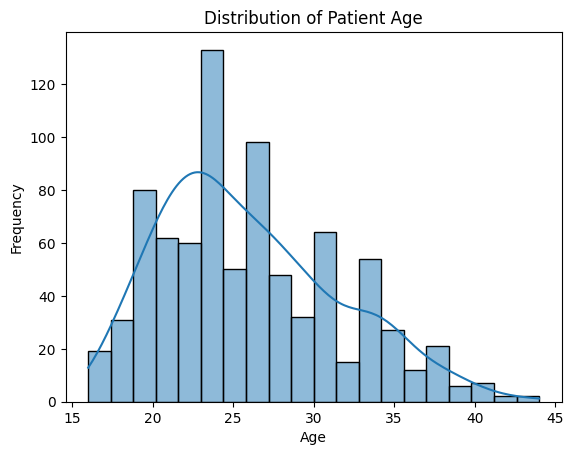

In [17]:
sns.histplot(df['Age'], kde=True, bins=20)
plt.title('Distribution of Patient Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0.5, 1.0, 'Age vs. BMI')

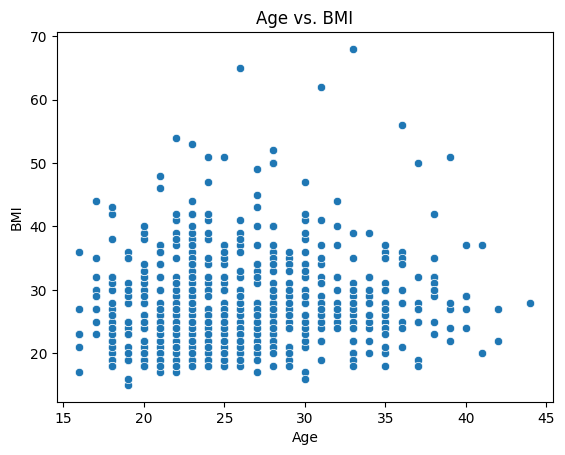

In [18]:
sns.scatterplot(x='Age', y='BMI', data=df)
plt.title('Age vs. BMI')

Text(0.5, 1.0, 'Gestational Age at Outcome by Group')

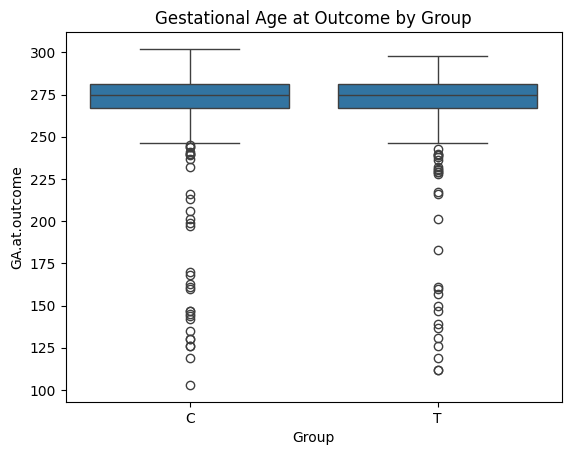

In [19]:
sns.boxplot(x='Group', y='GA.at.outcome', data=df)
plt.title('Gestational Age at Outcome by Group')

Text(0.5, 1.0, 'Gestational Age at Outcome by Race')

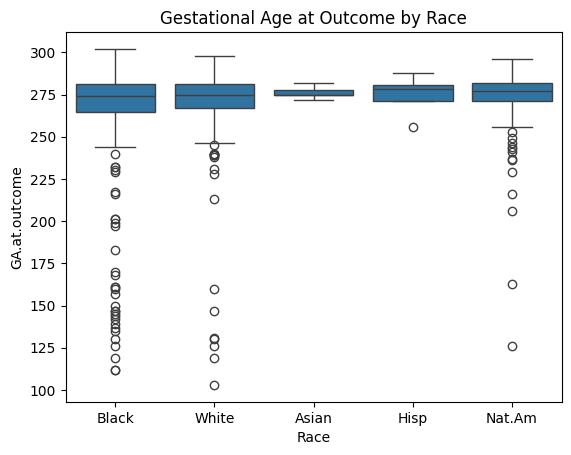

In [20]:
sns.boxplot(x='Race', y='GA.at.outcome', data=df)
plt.title('Gestational Age at Outcome by Race')


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.12/dist-packages/matplotlib/pyplot.py'>

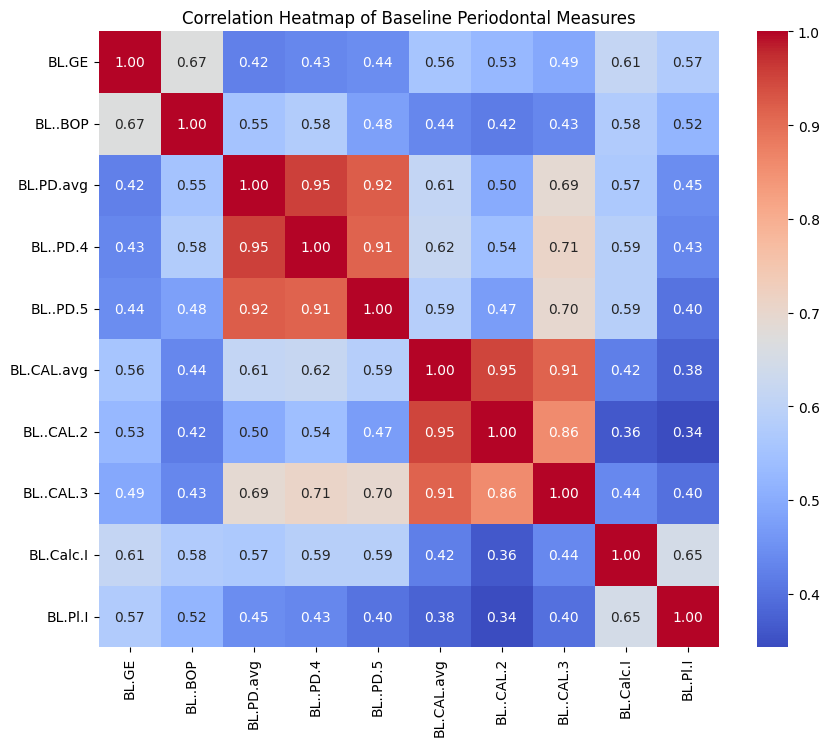

In [21]:
#Multivariate Analysis
baseline_periodontal_cols = ['BL.GE', 'BL..BOP', 'BL.PD.avg', 'BL..PD.4', 'BL..PD.5', 'BL.CAL.avg', 'BL..CAL.2', 'BL..CAL.3', 'BL.Calc.I', 'BL.Pl.I']
corr_matrix = df[baseline_periodontal_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Baseline Periodontal Measures')
plt

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

--- Analysis of Numerical Variables ---

Summary Statistics:
              Age         BMI   BL.PD.avg  Birthweight
count  823.000000  750.000000  823.000000   809.000000
mean    25.978129   27.669333    2.865181  3198.813350
std      5.565973    7.127299    0.562013   683.301508
min     16.000000   15.000000    1.851000   101.000000
25%     22.000000   23.000000    2.495500  2960.000000
50%     25.000000   26.000000    2.732000  3265.000000
75%     30.000000   31.000000    3.097500  3580.000000
max     44.000000   68.000000    6.967000  5160.000000

Skewness:
Age            0.597532
BMI            1.484198
BL.PD.avg      1.986333
Birthweight   -1.566302
dtype: float64


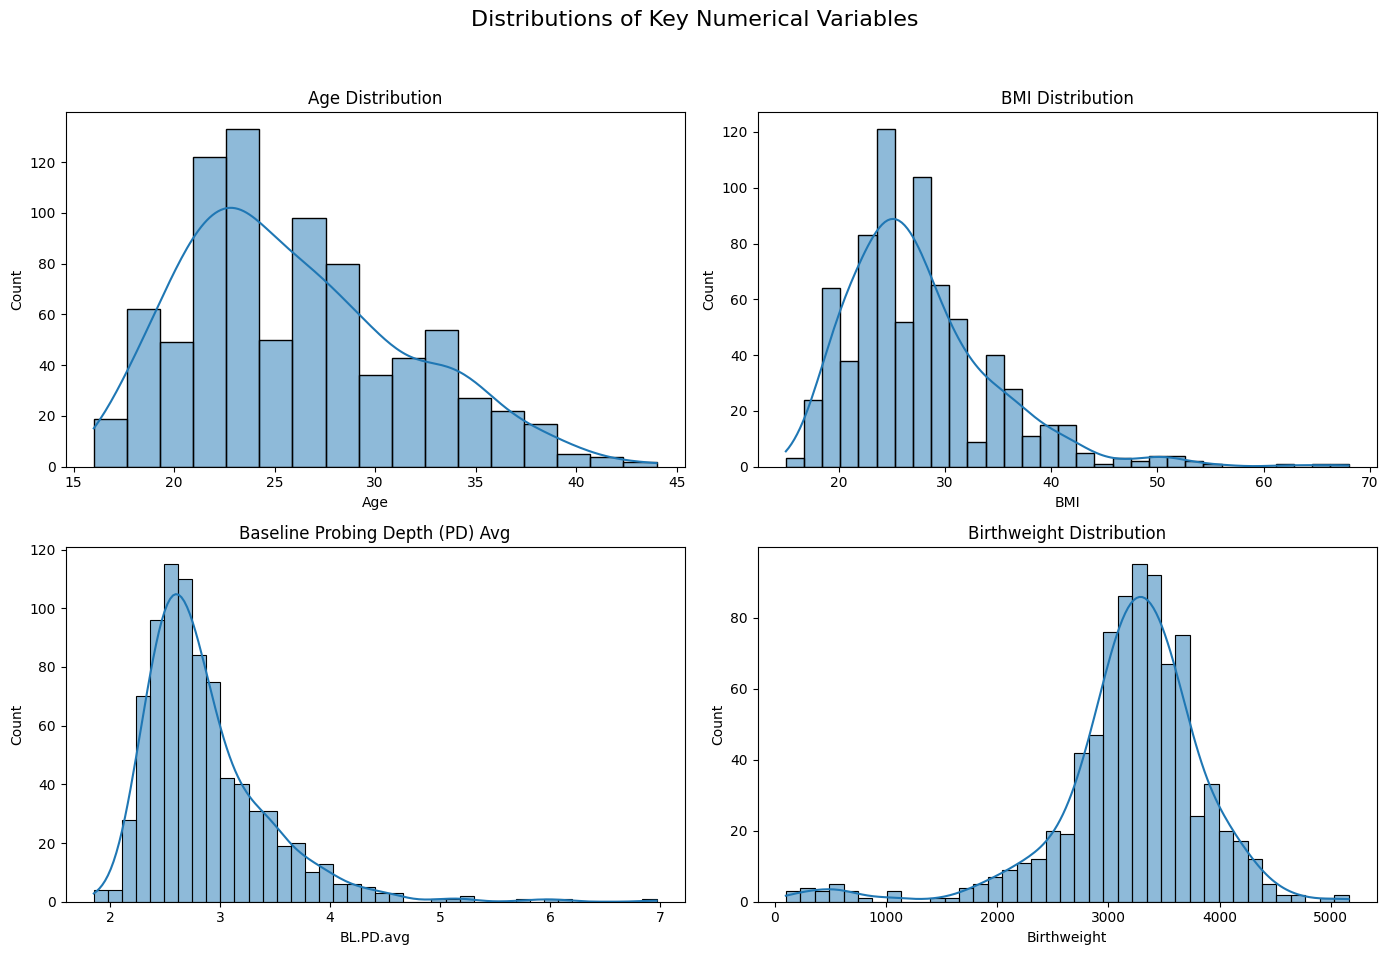

In [27]:
# 1D Analysis: Numerical Variables
numerical_vars = ['Age', 'BMI', 'BL.PD.avg', 'Birthweight']
print("\nSummary Statistics:")
print(df[numerical_vars].describe())

print("\nSkewness:")
print(df[numerical_vars].skew())

# Plotting distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
fig.suptitle('Distributions of Key Numerical Variables', fontsize=16)

sns.histplot(df['Age'], kde=True, ax=axes[0, 0]).set_title('Age Distribution')
sns.histplot(df['BMI'], kde=True, ax=axes[0, 1]).set_title('BMI Distribution')
sns.histplot(df['BL.PD.avg'], kde=True, ax=axes[1, 0]).set_title('Baseline Probing Depth (PD) Avg')
sns.histplot(df['Birthweight'], kde=True, ax=axes[1, 1]).set_title('Birthweight Distribution')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


--- Analysis of Categorical Variables ---

Frequency distribution for Group:
Group
T    413
C    410
Name: count, dtype: int64
------------------------------

Frequency distribution for Use.Tob:
Use.Tob
No     704
Yes     93
        26
Name: count, dtype: int64
------------------------------

Frequency distribution for Preg.ended...37.wk:
Preg.ended...37.wk
No     711
Yes    103
         9
Name: count, dtype: int64
------------------------------


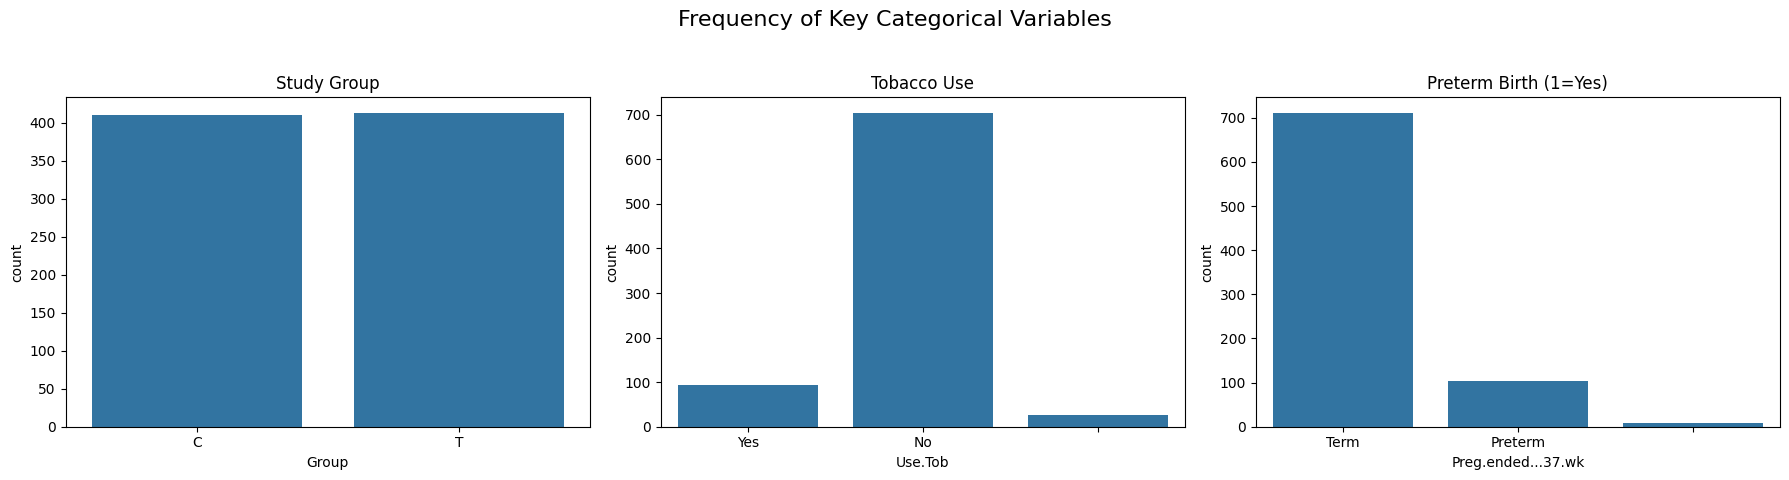

In [28]:
# 1D Analysis: Categorical Variables
categorical_vars = ['Group', 'Use.Tob', 'Preg.ended...37.wk']

for var in categorical_vars:
    print(f"\nFrequency distribution for {var}:")
    print(df[var].value_counts())
    print("-" * 30)

# Plotting distributions
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Frequency of Key Categorical Variables', fontsize=16)

sns.countplot(x='Group', data=df, ax=axes[0]).set_title('Study Group')
sns.countplot(x='Use.Tob', data=df, ax=axes[1]).set_title('Tobacco Use')
sns.countplot(x='Preg.ended...37.wk', data=df, ax=axes[2]).set_title('Preterm Birth (1=Yes)')
axes[2].set_xticklabels(['Term', 'Preterm'])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

Original data types:
BL.CAL.avg    float64
OCRP1          object
dtype: object
------------------------------

Data types after conversion:
BL.CAL.avg    float64
OCRP1         float64
dtype: object
------------------------------
Pearson Correlation between BL.CAL.avg and OCRP1: 0.048 (p-value: 0.175)


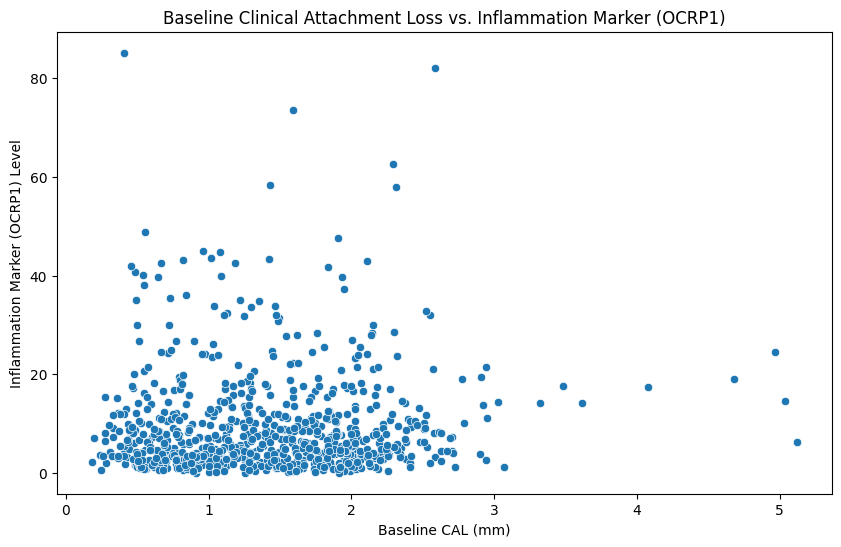

In [30]:
# 2D Analysis: Numerical vs. Numerical


print("Original data types:")
print(df[['BL.CAL.avg', 'OCRP1']].dtypes)
print("-" * 30)

# Convert the columns to a numeric type.
# errors='coerce' will replace any non-numeric values with NaN (Not a Number)
df['BL.CAL.avg'] = pd.to_numeric(df['BL.CAL.avg'], errors='coerce')
df['OCRP1'] = pd.to_numeric(df['OCRP1'], errors='coerce')

# Drop rows where either of these columns has NaN, so the correlation calculation can work
clean_df = df.dropna(subset=['BL.CAL.avg', 'OCRP1'])

print("\nData types after conversion:")
print(clean_df[['BL.CAL.avg', 'OCRP1']].dtypes)
print("-" * 30)

# Hypothesis: Baseline disease severity (BL.CAL.avg) correlates with inflammation (OCRP1).
plt.figure(figsize=(10, 6))
# Use the cleaned dataframe for plotting and calculation
sns.scatterplot(data=clean_df, x='BL.CAL.avg', y='OCRP1')
plt.title('Baseline Clinical Attachment Loss vs. Inflammation Marker (OCRP1)')
plt.xlabel('Baseline CAL (mm)')
plt.ylabel('Inflammation Marker (OCRP1) Level')

# Calculate correlation using the cleaned data
correlation, p_value = stats.pearsonr(clean_df['BL.CAL.avg'], clean_df['OCRP1'])
print(f"Pearson Correlation between BL.CAL.avg and OCRP1: {correlation:.3f} (p-value: {p_value:.3f})")

plt.show()

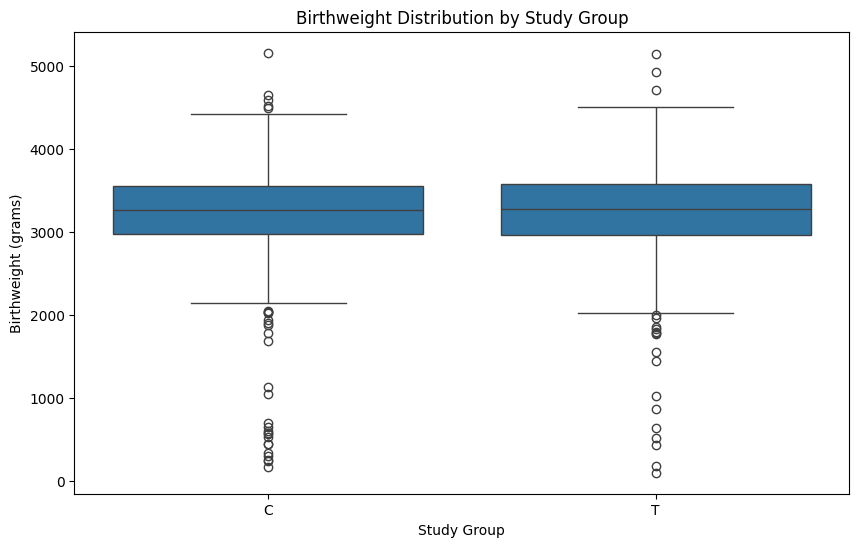

In [31]:
# 2D Analysis: Numerical vs. Categorical
# Hypothesis: Birthweight differs between the Treatment and Control groups.
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Group', y='Birthweight')
plt.title('Birthweight Distribution by Study Group')
plt.xlabel('Study Group')
plt.ylabel('Birthweight (grams)')
plt.show()

Contingency Table: Tobacco Use vs. Preterm Birth
Preg.ended...37.wk      No  Yes
Use.Tob                        
                    9   14    3
No                  0  619   85
Yes                 0   78   15


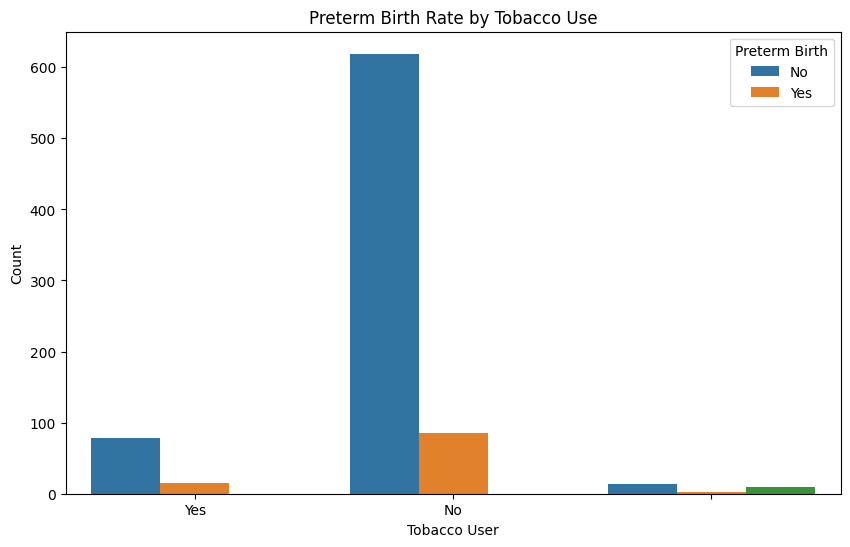

In [32]:
# 2D Analysis: Categorical vs. Categorical
# Hypothesis: The rate of preterm birth differs between smokers and non-smokers.
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Use.Tob', hue='Preg.ended...37.wk')
plt.title('Preterm Birth Rate by Tobacco Use')
plt.xlabel('Tobacco User')
plt.ylabel('Count')
plt.legend(title='Preterm Birth', labels=['No', 'Yes'])

# Create a contingency table
contingency_table = pd.crosstab(df['Use.Tob'], df['Preg.ended...37.wk'])
print("Contingency Table: Tobacco Use vs. Preterm Birth")
print(contingency_table)
plt.show()

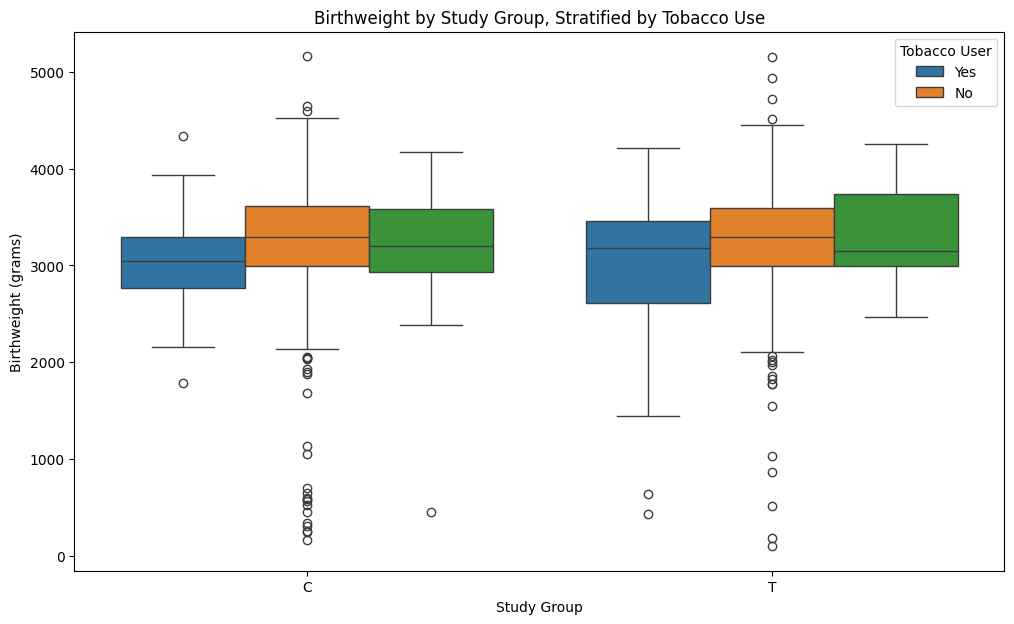

In [33]:
# 3D Analysis: Exploring an interaction effect
# Does the effect of the study Group on Birthweight depend on Tobacco Use?
plt.figure(figsize=(12, 7))
sns.boxplot(data=df, x='Group', y='Birthweight', hue='Use.Tob')
plt.title('Birthweight by Study Group, Stratified by Tobacco Use')
plt.xlabel('Study Group')
plt.ylabel('Birthweight (grams)')
plt.legend(title='Tobacco User')
plt.show()

# This plot helps us visually inspect if, for example, the treatment was more or less effective for smokers vs. non-smokers.

In [35]:
# 1. Select features for clustering
features = ['Age', 'BMI', 'BL.PD.avg', 'BL.CAL.avg', 'OCRP1', 'BL.PG']
df_cluster = df[features].copy()
print(f"Selected {len(features)} features for clustering.")
print(f"Original shape of feature set: {df_cluster.shape}")

df_cluster.dropna(inplace=True)
print(f"Shape after dropping NaNs: {df_cluster.shape}")

# 2. Scale the features (after cleaning the data)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_cluster)
print("\nData has been cleaned and scaled.")

# 3. Apply DBSCAN
# The parameters `eps` and `min_samples` are crucial and often require tuning.
dbscan = DBSCAN(eps=1.5, min_samples=5)
clusters = dbscan.fit_predict(df_scaled)

# Add cluster labels back to the original dataframe
# Note: We need to align the cluster labels with the original dataframe, as we may have dropped rows.
# We will add the labels to the cleaned dataframe (`df_cluster`) instead.
df_cluster['Cluster'] = clusters
print("\nDBSCAN has been applied.")

# 4. Analyze the results
print("\nCluster Distribution:")
print(df_cluster['Cluster'].value_counts())
# Cluster -1 represents noise points (outliers).

Selected 6 features for clustering.
Original shape of feature set: (823, 6)
Shape after dropping NaNs: (348, 6)

Data has been cleaned and scaled.

DBSCAN has been applied.

Cluster Distribution:
Cluster
 0    317
-1     26
 1      5
Name: count, dtype: int64


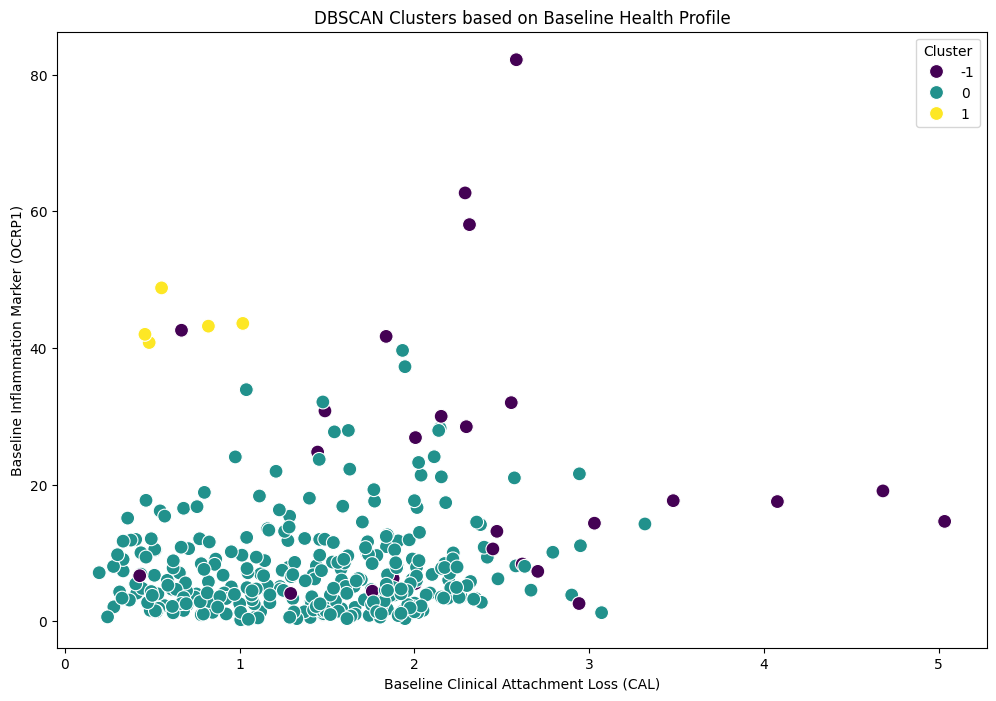

In [37]:
# 5. Visualize the clusters
# Visualizing multi-dimensional clusters is challenging. A common approach is to plot them
# against two of the most important features.

plt.figure(figsize=(12, 8))
sns.scatterplot(data=df_cluster, x='BL.CAL.avg', y='OCRP1', hue='Cluster', palette='viridis', s=100)

plt.title('DBSCAN Clusters based on Baseline Health Profile')
plt.xlabel('Baseline Clinical Attachment Loss (CAL)')
plt.ylabel('Baseline Inflammation Marker (OCRP1)')
plt.legend(title='Cluster')
plt.show()

# Interpretation: This plot helps us visualize the found clusters. For example, a specific cluster might represent
# patients with both high CAL and high inflammation, while another might represent healthier profiles.
# The noise points (Cluster -1) are individuals who don't fit well into any specific group.